# Dataset Description

- You have data about customers of a mall.

- One row is the data of a particular customer.

- Features: `Gender`, `Age`, `Annual Income`, `Spending Score`

- `Spending Score` (1-100) is a metric of how much the customer spends where 100 is the highest score.

- **Task:** Understand the customers, identify some patterns from the customer base.
    - Build classes out of the dataset.

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
# training examples
x = dataset.iloc[:, 1:].values

In [5]:
print(type(x))
print(x.shape)
print(x)

<class 'numpy.ndarray'>
(200, 4)
[['Male' 19 15 39]
 ['Male' 21 15 81]
 ['Female' 20 16 6]
 ['Female' 23 16 77]
 ['Female' 31 17 40]
 ['Female' 22 17 76]
 ['Female' 35 18 6]
 ['Female' 23 18 94]
 ['Male' 64 19 3]
 ['Female' 30 19 72]
 ['Male' 67 19 14]
 ['Female' 35 19 99]
 ['Female' 58 20 15]
 ['Female' 24 20 77]
 ['Male' 37 20 13]
 ['Male' 22 20 79]
 ['Female' 35 21 35]
 ['Male' 20 21 66]
 ['Male' 52 23 29]
 ['Female' 35 23 98]
 ['Male' 35 24 35]
 ['Male' 25 24 73]
 ['Female' 46 25 5]
 ['Male' 31 25 73]
 ['Female' 54 28 14]
 ['Male' 29 28 82]
 ['Female' 45 28 32]
 ['Male' 35 28 61]
 ['Female' 40 29 31]
 ['Female' 23 29 87]
 ['Male' 60 30 4]
 ['Female' 21 30 73]
 ['Male' 53 33 4]
 ['Male' 18 33 92]
 ['Female' 49 33 14]
 ['Female' 21 33 81]
 ['Female' 42 34 17]
 ['Female' 30 34 73]
 ['Female' 36 37 26]
 ['Female' 20 37 75]
 ['Female' 65 38 35]
 ['Male' 24 38 92]
 ['Male' 48 39 36]
 ['Female' 31 39 61]
 ['Female' 49 39 28]
 ['Female' 24 39 65]
 ['Female' 50 40 55]
 ['Female' 27 40 47]
 

# Using only 2 features to train K-Means, to visualize the clusters

- Lets just make use of `Annual Income`, and `Spending Score` features to do this.

- Since we have only 2 features, we can make a 2D plot to visualize the clusters.

- **Later, we will use K-Means for all the clusters.**

In [8]:
# get the training examples
X = dataset.iloc[:, 3:].values

In [9]:
print(type(X))
print(X.shape)
print(X)

<class 'numpy.ndarray'>
(200, 2)
[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]

# Using the Elbow Method to determine optimal number of clusters

- Lets run the elbow method for `K` ranging from `1` to `100`.

- Then, choose the value of `K` with least value of cost function, `WCSS`.

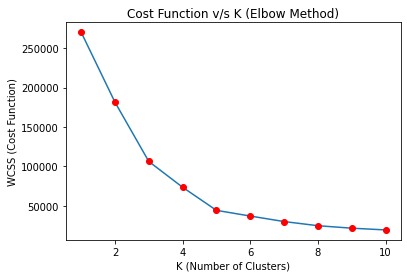

In [14]:
# using the elbow method (based on WCSS) to find optimal number of clusters

from sklearn.cluster import KMeans

# run k-means for different values of k (elbow method)
# for each value of k, compute WCSS
wcss = []

for k in range(1, 10 + 1):
    model = KMeans(n_clusters = k, random_state = 42)
    # train the model
    model.fit(X)
    # compute wcss
    wcss_k = model.inertia_
    wcss.append(wcss_k)
    
# plot elbow method graph
plt.plot(list(range(1, 10 + 1)), wcss, marker = 'o', markerfacecolor = 'r', markeredgecolor = 'r')
plt.xlabel('K (Number of Clusters)')
plt.ylabel('WCSS (Cost Function)')
plt.title('Cost Function v/s K (Elbow Method)')
plt.show()

# we observe that 5 is the number of optimal number of clusters

# Training K-Means with 5 clusters

- From elbow method, we observe that `5` is an optimal value for `K`.

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- You can train the K-Means model, and predict the cluster number for the training set, using the `fit_predict()` method.

In [15]:
# K-Means for 5 clusters
model = KMeans(n_clusters = 5, random_state = 42)

# train the model and predict the cluster numbers
y_pred = model.fit_predict(X)

# Visualizing the Clustering results

In [16]:
# gives the cluster number for each datapoint
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

[55.2962963  88.2        26.30434783 25.72727273 86.53846154] [49.51851852 17.11428571 20.91304348 79.36363636 82.12820513]


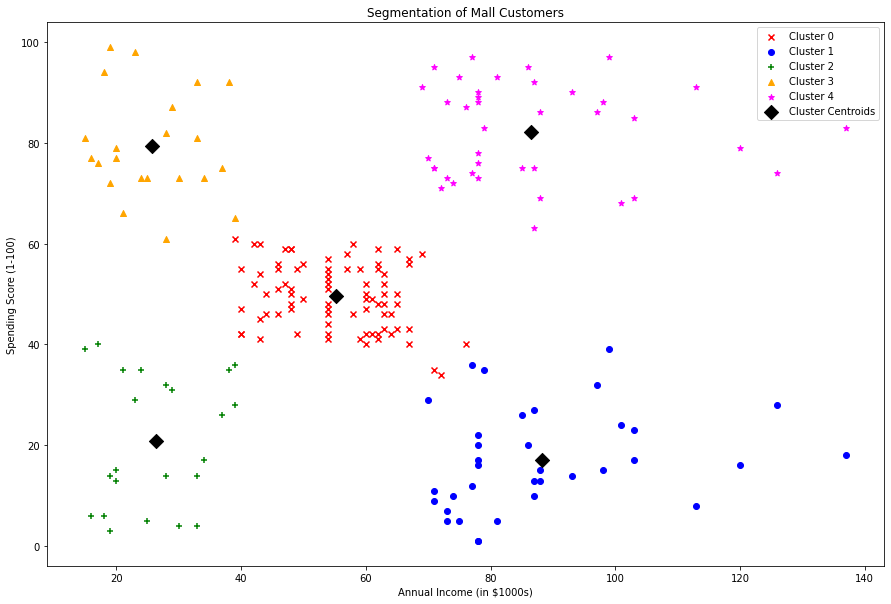

In [39]:
# visualising the clusters (make a scatter plot one by one)
# x-coordinates: column with index 0
# y-coordinates: column with index 1

fig = plt.figure(figsize = (15, 10))

# scatter plot for all customers inside cluster 0
x_coord_0 = X[y_pred == 0, 0]
y_coord_0 = X[y_pred == 0, 1]
plt.scatter(x_coord_0, y_coord_0, marker = 'x', color = 'red', label = 'Cluster 0')

# scatter plot for all customers inside cluster 1
x_coord_1 = X[y_pred == 1, 0]
y_coord_1 = X[y_pred == 1, 1]
plt.scatter(x_coord_1, y_coord_1, marker = 'o', color = 'blue', label = 'Cluster 1')

# scatter plot for all customers inside cluster 2
x_coord_2 = X[y_pred == 2, 0]
y_coord_2 = X[y_pred == 2, 1]
plt.scatter(x_coord_2, y_coord_2, marker = '+', color = 'green', label = 'Cluster 2')

# scatter plot for all customers inside cluster 3
x_coord_3 = X[y_pred == 3, 0]
y_coord_3 = X[y_pred == 3, 1]
plt.scatter(x_coord_3, y_coord_3, marker = '^', color = 'orange', label = 'Cluster 3')

# scatter plot for all customers inside cluster 4
x_coord_4 = X[y_pred == 4, 0]
y_coord_4 = X[y_pred == 4, 1]
plt.scatter(x_coord_4, y_coord_4, marker = '*', color = 'magenta', label = 'Cluster 4')

# Plot the centroid of each cluster (available with the k-means object)
centroids = model.cluster_centers_
print(centroids[:, 0], centroids[:, 1])

plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'D', color = 'black', label = 'Cluster Centroids', s = 100)

# legend & labels
plt.legend()
plt.xlabel('Annual Income (in $1000s)')
plt.ylabel('Spending Score (1-100)')
plt.title('Segmentation of Mall Customers')

plt.show()

# Training the K-Means model using all features

In [41]:
x = dataset.iloc[:, 1:].values

In [42]:
print(type(x))
print(x.shape)
print(x)

<class 'numpy.ndarray'>
(200, 4)
[['Male' 19 15 39]
 ['Male' 21 15 81]
 ['Female' 20 16 6]
 ['Female' 23 16 77]
 ['Female' 31 17 40]
 ['Female' 22 17 76]
 ['Female' 35 18 6]
 ['Female' 23 18 94]
 ['Male' 64 19 3]
 ['Female' 30 19 72]
 ['Male' 67 19 14]
 ['Female' 35 19 99]
 ['Female' 58 20 15]
 ['Female' 24 20 77]
 ['Male' 37 20 13]
 ['Male' 22 20 79]
 ['Female' 35 21 35]
 ['Male' 20 21 66]
 ['Male' 52 23 29]
 ['Female' 35 23 98]
 ['Male' 35 24 35]
 ['Male' 25 24 73]
 ['Female' 46 25 5]
 ['Male' 31 25 73]
 ['Female' 54 28 14]
 ['Male' 29 28 82]
 ['Female' 45 28 32]
 ['Male' 35 28 61]
 ['Female' 40 29 31]
 ['Female' 23 29 87]
 ['Male' 60 30 4]
 ['Female' 21 30 73]
 ['Male' 53 33 4]
 ['Male' 18 33 92]
 ['Female' 49 33 14]
 ['Female' 21 33 81]
 ['Female' 42 34 17]
 ['Female' 30 34 73]
 ['Female' 36 37 26]
 ['Female' 20 37 75]
 ['Female' 65 38 35]
 ['Male' 24 38 92]
 ['Male' 48 39 36]
 ['Female' 31 39 61]
 ['Female' 49 39 28]
 ['Female' 24 39 65]
 ['Female' 50 40 55]
 ['Female' 27 40 47]
 

In [43]:
# encode categorical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

column_transformer = ColumnTransformer(
    transformers = [('encoder', OneHotEncoder(), [0])],
    remainder = 'passthrough'
)

x = column_transformer.fit_transform(x)

In [45]:
print(x.shape)
print(x)

(200, 5)
[[0.0 1.0 19 15 39]
 [0.0 1.0 21 15 81]
 [1.0 0.0 20 16 6]
 [1.0 0.0 23 16 77]
 [1.0 0.0 31 17 40]
 [1.0 0.0 22 17 76]
 [1.0 0.0 35 18 6]
 [1.0 0.0 23 18 94]
 [0.0 1.0 64 19 3]
 [1.0 0.0 30 19 72]
 [0.0 1.0 67 19 14]
 [1.0 0.0 35 19 99]
 [1.0 0.0 58 20 15]
 [1.0 0.0 24 20 77]
 [0.0 1.0 37 20 13]
 [0.0 1.0 22 20 79]
 [1.0 0.0 35 21 35]
 [0.0 1.0 20 21 66]
 [0.0 1.0 52 23 29]
 [1.0 0.0 35 23 98]
 [0.0 1.0 35 24 35]
 [0.0 1.0 25 24 73]
 [1.0 0.0 46 25 5]
 [0.0 1.0 31 25 73]
 [1.0 0.0 54 28 14]
 [0.0 1.0 29 28 82]
 [1.0 0.0 45 28 32]
 [0.0 1.0 35 28 61]
 [1.0 0.0 40 29 31]
 [1.0 0.0 23 29 87]
 [0.0 1.0 60 30 4]
 [1.0 0.0 21 30 73]
 [0.0 1.0 53 33 4]
 [0.0 1.0 18 33 92]
 [1.0 0.0 49 33 14]
 [1.0 0.0 21 33 81]
 [1.0 0.0 42 34 17]
 [1.0 0.0 30 34 73]
 [1.0 0.0 36 37 26]
 [1.0 0.0 20 37 75]
 [1.0 0.0 65 38 35]
 [0.0 1.0 24 38 92]
 [0.0 1.0 48 39 36]
 [1.0 0.0 31 39 61]
 [1.0 0.0 49 39 28]
 [1.0 0.0 24 39 65]
 [1.0 0.0 50 40 55]
 [1.0 0.0 27 40 47]
 [1.0 0.0 29 40 42]
 [1.0 0.0 31 40 4

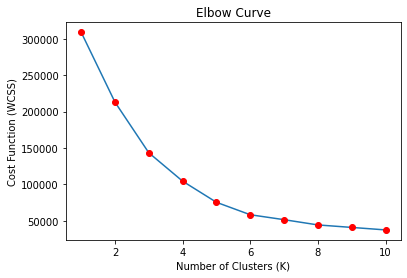

In [56]:
# use elbow method to determine optimal number of cluster
max_k = 10
wcss = []
for k in range(1, max_k + 1):
    model = KMeans(n_clusters = k, random_state = 42)
    # train the model
    model.fit(x)
    # get WCSS value
    wcss.append(model.inertia_)

# plot the curve
plt.plot(list(range(1, max_k + 1)), wcss, marker = 'o', markerfacecolor = 'red', markeredgecolor = 'red')

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost Function (WCSS)')
plt.title('Elbow Curve')

plt.show()

In [48]:
# training K-means model for 6 clusters (from above graph, 6 seems to be an optimal choice)
model = KMeans(n_clusters = 6, random_state = 42)

# train the model
model.fit(x)

# get the cluster centroid
cluster_allocation = model.predict(x)

In [54]:
print(cluster_allocation)

[5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 1 2 1 4 5 2 1 4 4 4 1 4 4 1 1 1 1 1 4 1 1 4 1 1 1 4 1 1 4 4 1 1 1 1
 1 4 1 4 4 1 1 4 1 1 4 1 1 4 4 1 1 4 1 4 4 4 1 4 1 4 4 1 1 4 1 4 1 1 1 1 1
 4 4 4 4 4 1 1 1 1 4 4 4 0 4 0 3 0 3 0 3 0 4 0 3 0 3 0 3 0 3 0 4 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


In [55]:
# see the cluster centroid
m = len(dataset)
for i in range(m):
    x_i = dataset.iloc[i, :]
    print(x_i)
    print(f'Cluster Number: {cluster_allocation[i]}', end = '\n-----------\n')

CustomerID                   1
Genre                     Male
Age                         19
Annual Income (k$)          15
Spending Score (1-100)      39
Name: 0, dtype: object
Cluster Number: 5
-----------
CustomerID                   2
Genre                     Male
Age                         21
Annual Income (k$)          15
Spending Score (1-100)      81
Name: 1, dtype: object
Cluster Number: 2
-----------
CustomerID                     3
Genre                     Female
Age                           20
Annual Income (k$)            16
Spending Score (1-100)         6
Name: 2, dtype: object
Cluster Number: 5
-----------
CustomerID                     4
Genre                     Female
Age                           23
Annual Income (k$)            16
Spending Score (1-100)        77
Name: 3, dtype: object
Cluster Number: 2
-----------
CustomerID                     5
Genre                     Female
Age                           31
Annual Income (k$)            17
Spending Score (